Extraccion de datos automatica de formato excel

In [17]:
import pandas as pd
import os
os.chdir('C:\\Users\\usuario\\Desktop\\Maestr\xedas\\Maestria finanzas eafit\\Tesis_Network')
#C:\\Users\\usuario\\Desktop\\Maestr\xedas\\Maestria finanzas eafit\\Tesis_Network\\

In [18]:
path_data="C:\\Users\\usuario\\Desktop\\Maestr\xedas\\Maestria finanzas eafit\\Tesis_Network\\data\\"
pais="COLOMBIA.xlsx"
path_colombia=path_data+pais

In [19]:
#Lista de empresas
companies=["BANCOLOMBIA","NUTRESA","ECOPETROL","GRUPOSURA","CEMARGOS"]
mapeo={"FIDUCIARIA BANCOLOMBIA SA":"BANCOLOMBIA","ECOPETROL ADR PROGRAM":"ECOPETROL","GRUPO NUTRESA SA":"NUTRESA","GRUPO ARGOS SA":"CEMARGOS"}

In [20]:
m= pd.read_excel(path_colombia,sheetname=companies,usecols=['Holder Name','Position','Latest Chg','Country'])

In [24]:
n={}
for name, item in m.items():
    item=item[(item["Country"]=="Colombia")|(item["Country"]=="Peru")|(item["Country"]=="Chile")|(item["Country"]=="Mexico")]
    item["Node"]=name
    item["Holder Name"]=item["Holder Name"].map(mapeo)
    m[name]=item
    n[name]=zip(item["Holder Name"],item["Node"])
    
n

{'BANCOLOMBIA': [(nan, 'BANCOLOMBIA'),
  (nan, 'BANCOLOMBIA'),
  (nan, 'BANCOLOMBIA'),
  (nan, 'BANCOLOMBIA'),
  (nan, 'BANCOLOMBIA'),
  (nan, 'BANCOLOMBIA')],
 'CEMARGOS': [('CEMARGOS', 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  ('BANCOLOMBIA', 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS'),
  (nan, 'CEMARGOS')],
 'ECOPETROL': [(nan, 'ECOPETROL'),
  ('ECOPETROL', 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  ('BANCOLOMBIA', 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  (nan, 'ECOPETROL'),
  (nan, 'ECOPETROL')],
 'GRUPOSURA': [('CEMARGOS', 'GRUPOSURA'),
  ('NUTRESA', 'GRUPOSURA'),
  (nan, 'GRUPOSURA'),
  (nan, 'GRUPOSURA'),
  ('BANCOLOMBIA', 'GRUPOSURA'),
  (nan, 'GRUPOSURA'),
  (nan, 'GRUPOSURA'),
  (nan, 'GRUPOSURA'),
  (nan, 'G

NameError: name 'BANCOLOMBIA' is not defined

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()

In [33]:
G.add_nodes_from(companies)
G.add_edges_from(n["BANCOLOMBIA"])
G.add_edges_from(n["CEMARGOS"])
G.add_edges_from(n["ECOPETROL"])
G.add_edges_from(n["NUTRESA"])
G.add_edges_from(n["GRUPOSURA"])

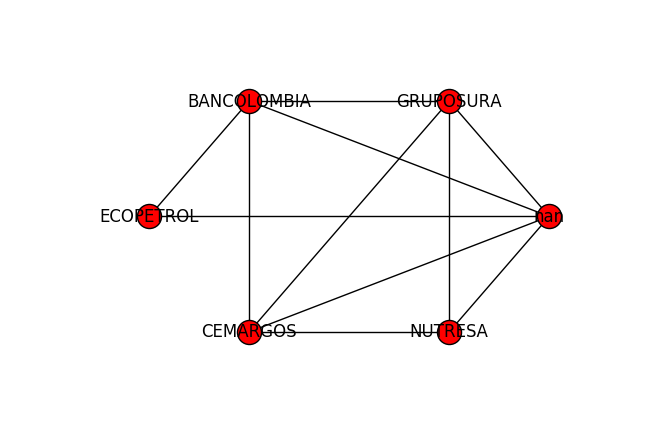

In [37]:
nx.draw_circular(G,with_labels=True)
plt.show()